<a href="https://colab.research.google.com/github/Prabhatha-Mayukha/Prabhatha-Mayukha/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('orange_juice_withmissing.csv')

In [ ]:
print("Dimensions:", df.shape)
print("\nSummary:\n", df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

Dimensions: (1070, 18)

Summary:
        Purchase  WeekofPurchase      StoreID      PriceCH      PriceMM  \
count      1070     1070.000000  1069.000000  1069.000000  1066.000000   
unique        2             NaN          NaN          NaN          NaN   
top          CH             NaN          NaN          NaN          NaN   
freq        653             NaN          NaN          NaN          NaN   
mean        NaN      254.381308     3.956969     1.867428     2.085038   
std         NaN       15.558286     2.308189     0.102017     0.134429   
min         NaN      227.000000     1.000000     1.690000     1.690000   
25%         NaN      240.000000     2.000000     1.790000     1.990000   
50%         NaN      257.000000     3.000000     1.860000     2.090000   
75%         NaN      268.000000     7.000000     1.990000     2.180000   
max         NaN      278.000000     7.000000     2.090000     2.290000   

             DiscCH       DiscMM    SpecialCH    SpecialMM      LoyalCH  \
co

In [ ]:
df['PriceCH'].fillna(df['PriceCH'].mean(), inplace=True)
df['PriceMM'].fillna(df['PriceMM'].mean(), inplace=True)
df['StoreID'].fillna(df['StoreID'].mode()[0], inplace=True)
df['DiscCH'].fillna(df['DiscCH'].mean(), inplace=True)

In [ ]:
df['DiscMM'].fillna(df['DiscMM'].mean(), inplace=True)
df['LoyalCH'].fillna(df['LoyalCH'].mean(), inplace=True)
df['SalePriceMM'].fillna(df['SalePriceMM'].mean(), inplace=True)
df['SalePriceCH'].fillna(df['SalePriceCH'].mean(), inplace=True)

In [ ]:
df['PctDiscMM'].fillna(df['PctDiscMM'].mean(), inplace=True)
df['PctDiscCH'].fillna(df['PctDiscCH'].mean(), inplace=True)
df['SpecialCH'].fillna(df['SpecialCH'].mode()[0], inplace=True)
df['SpecialMM'].fillna(df['SpecialMM'].mode()[0], inplace=True)
df['STORE'].fillna(df['STORE'].mode()[0], inplace=True)

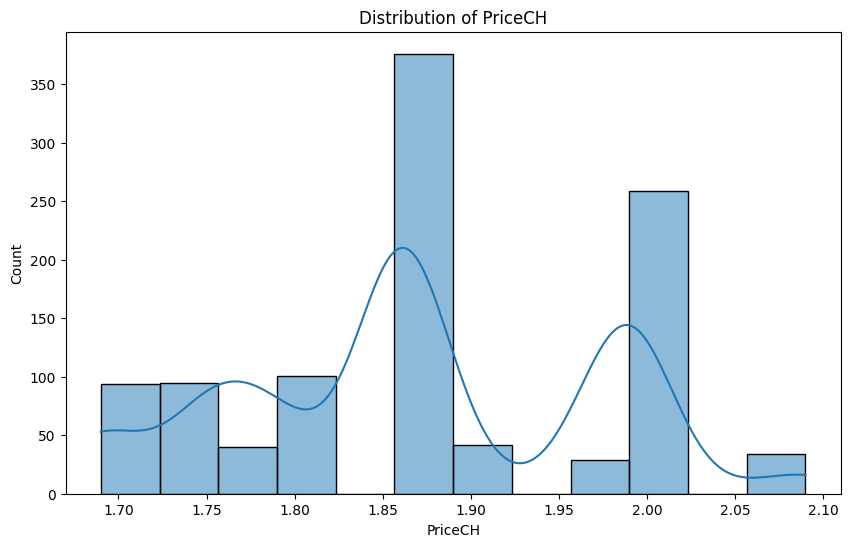

In [ ]:
# 3. Univariate Analysis - Distribution of individual variables
plt.figure(figsize=(10,6))
sns.histplot(df['PriceCH'], kde=True)
plt.title('Distribution of PriceCH')
plt.show()

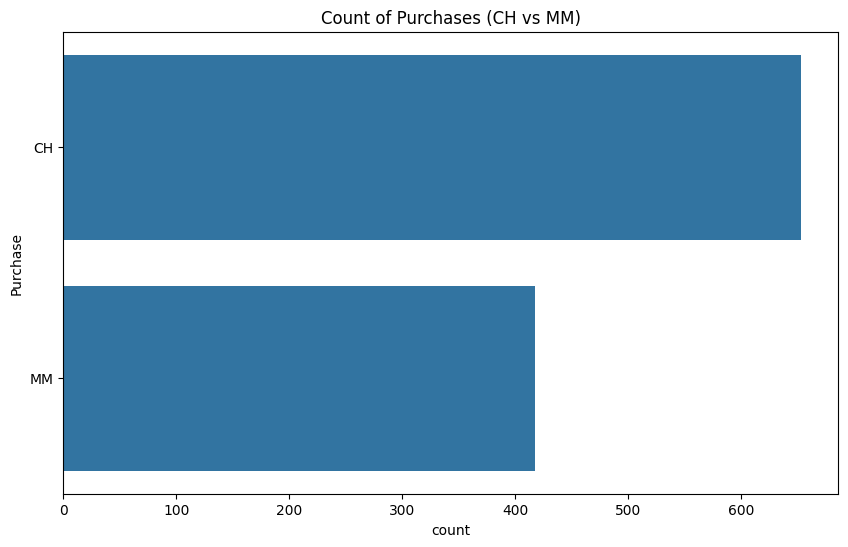

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['Purchase'])
plt.title('Count of Purchases (CH vs MM)')
plt.show()

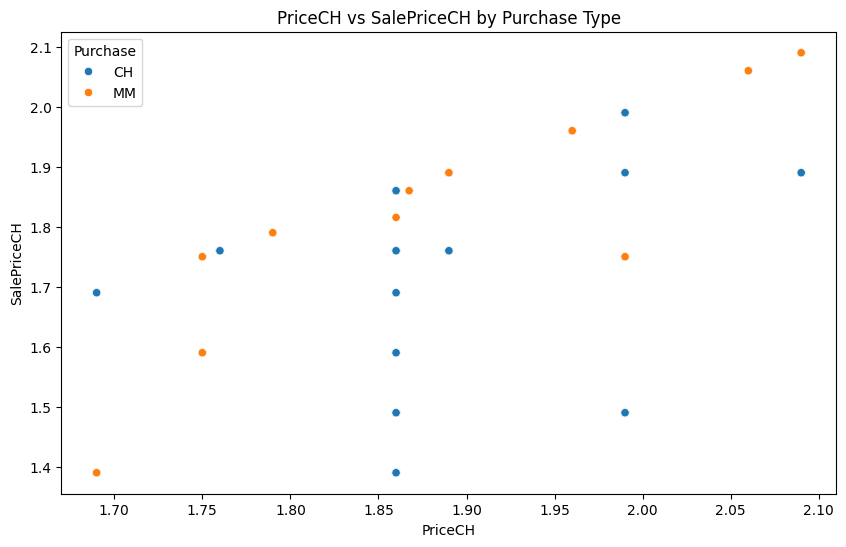

In [ ]:
# 4. Bivariate Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='PriceCH', y='SalePriceCH', hue='Purchase', data=df)
plt.title('PriceCH vs SalePriceCH by Purchase Type')
plt.show()

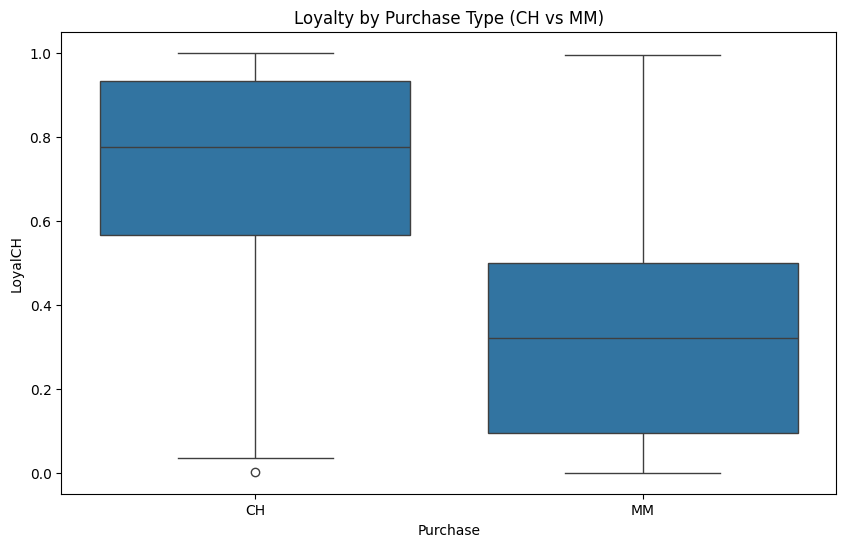

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Purchase', y='LoyalCH', data=df)
plt.title('Loyalty by Purchase Type (CH vs MM)')
plt.show()

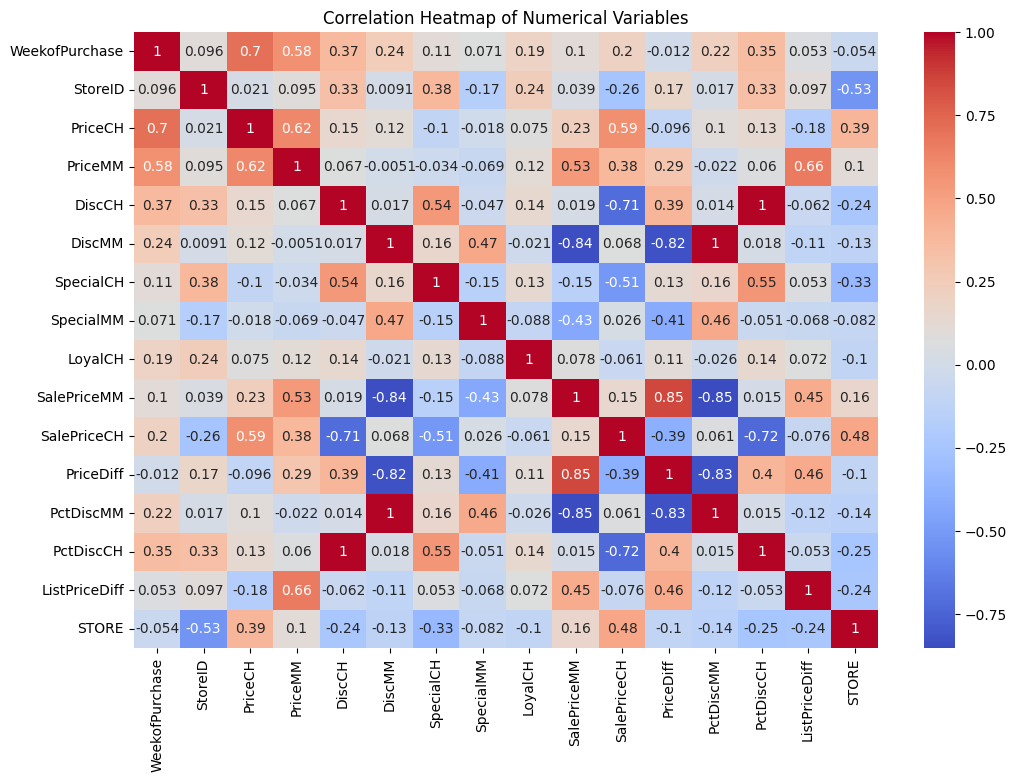

In [ ]:
# 5. Multivariate Analysis - Correlation Matrix
plt.figure(figsize=(12,8))
# Include numeric_only=True to only include numerical columns in the correlation
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

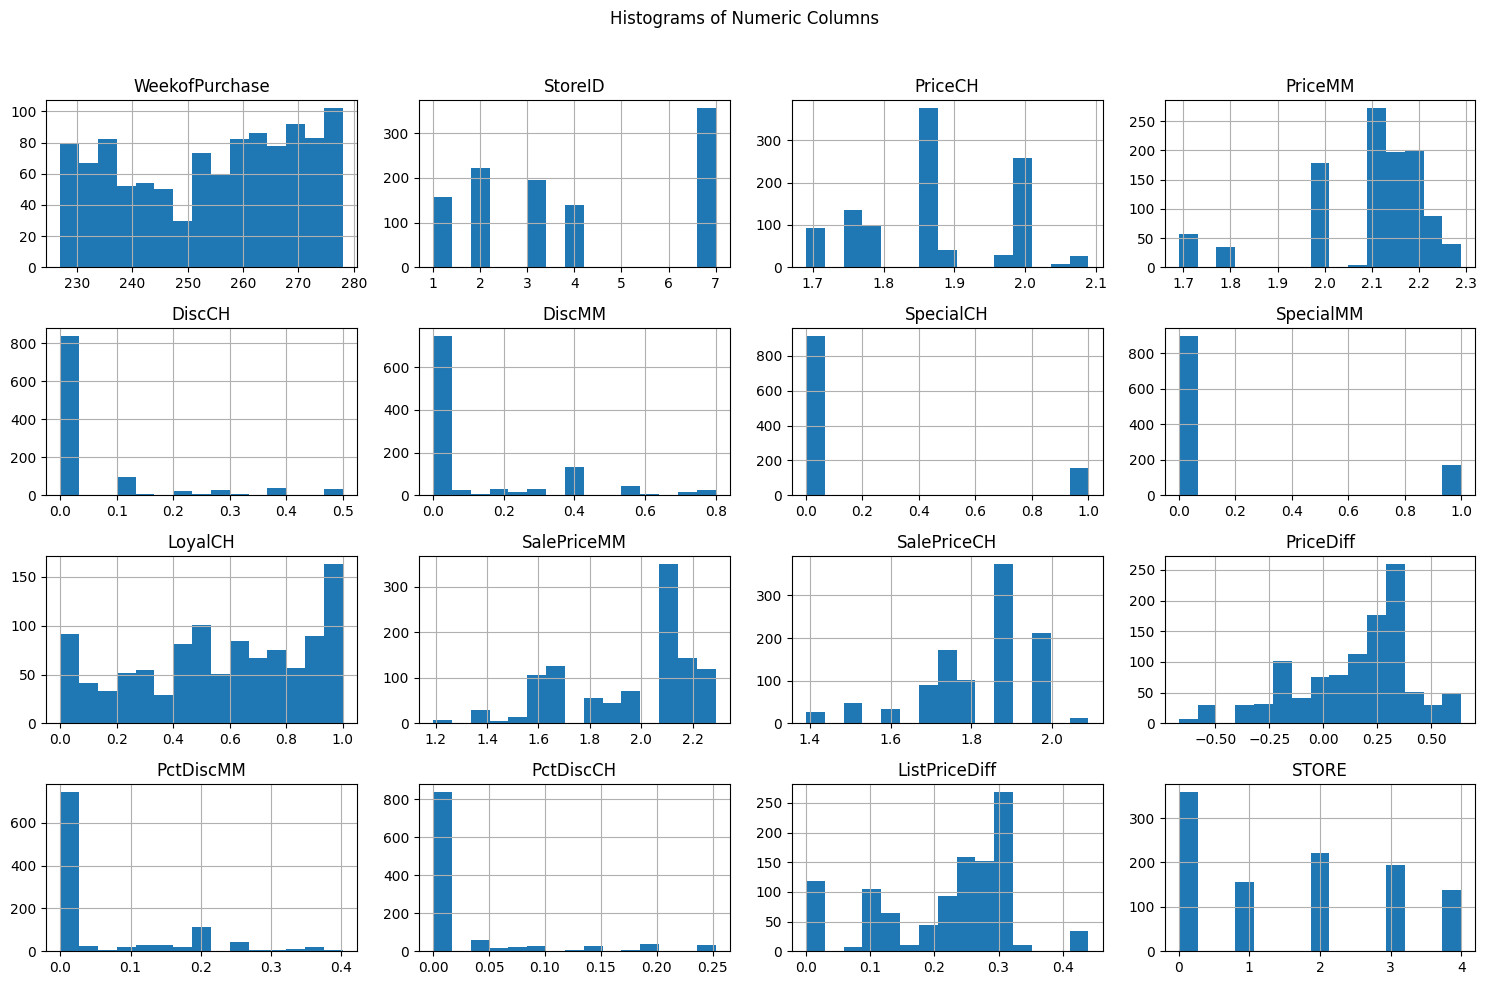

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


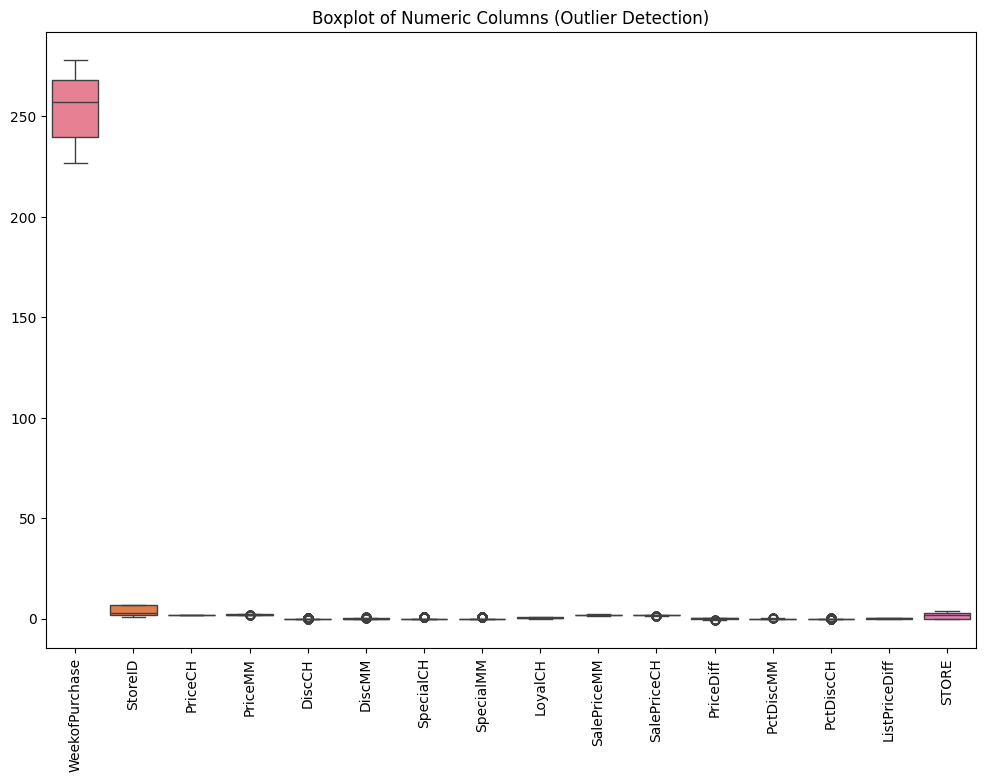

In [ ]:
#Boxplots for outlier detection
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Columns (Outlier Detection)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
corr_matrix = df[['PriceCH', 'PriceMM', 'SalePriceCH', 'SalePriceMM', 'LoyalCH']].corr()

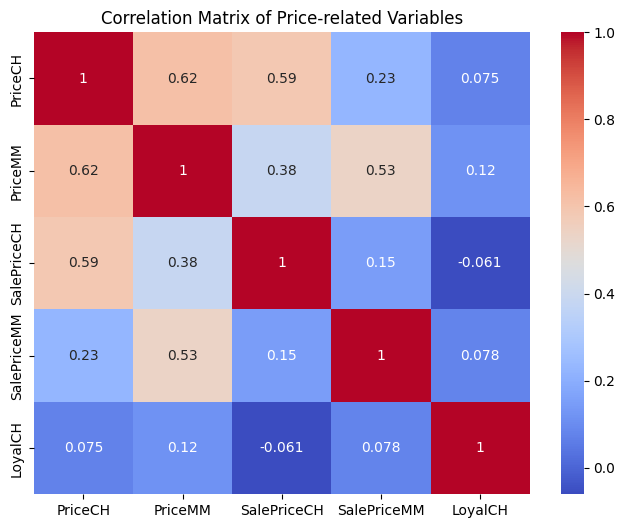

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price-related Variables')
plt.show()